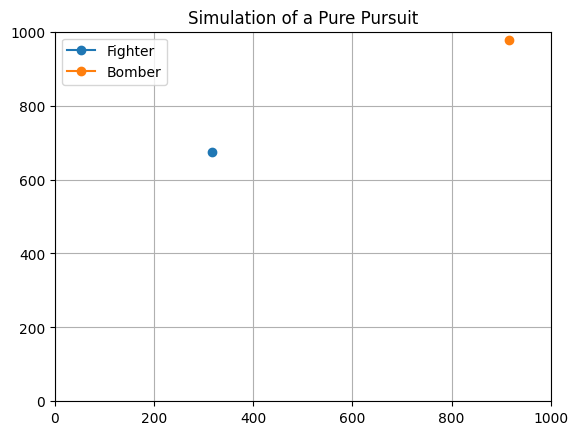

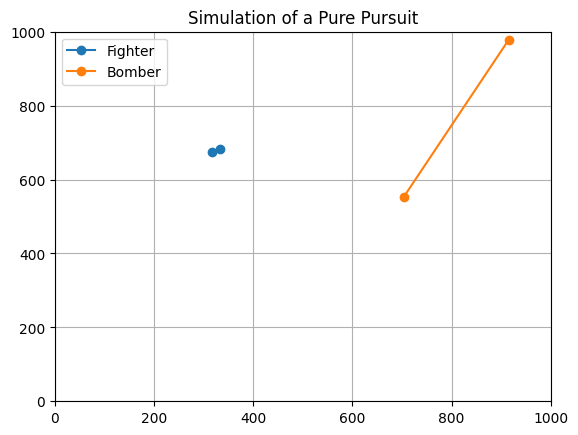

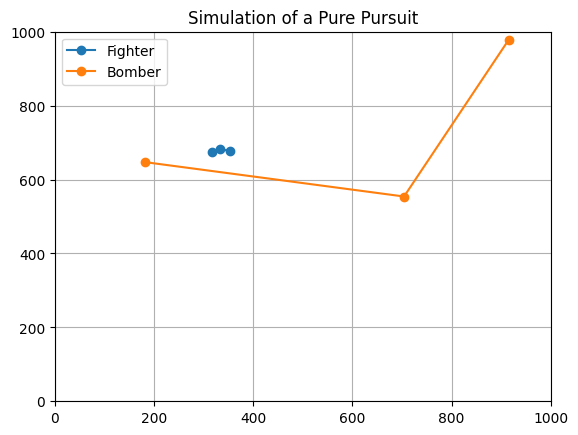

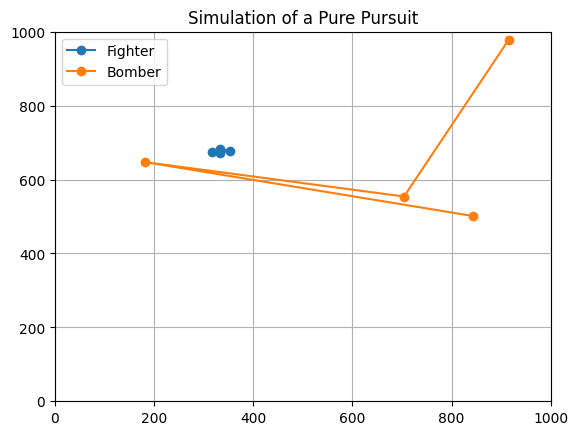

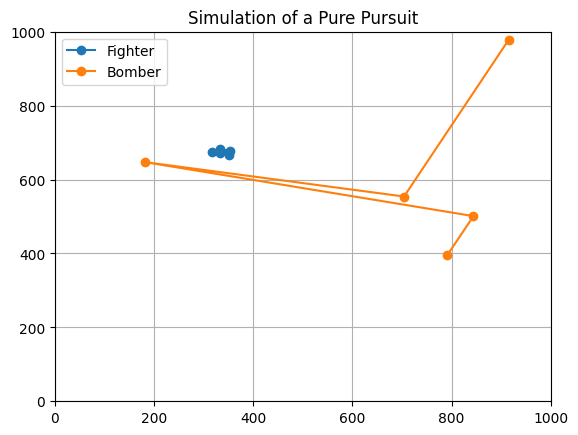

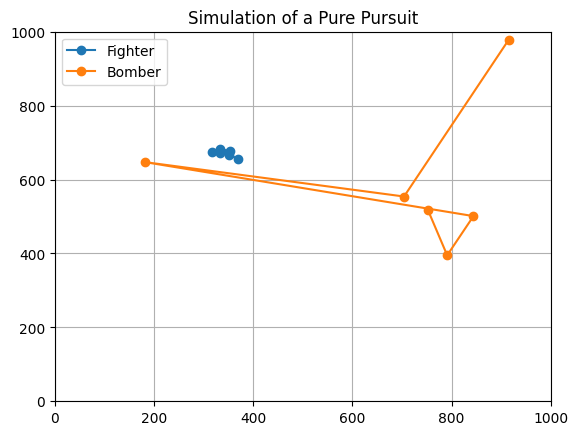

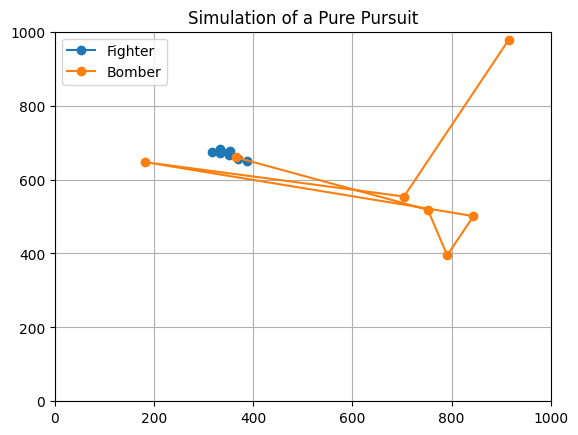

Target caught at 6 second


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def pure_pursuit(x_bomber, y_bomber, xf, yf, fighter_speed):
    """Simulates a pure pursuit problem within a rectangular range."""

    x_fighter = []
    y_fighter = []
    time = 0
    escape_distance, caught_distance = 900, 100

    while True:
        x_fighter.append(xf)
        y_fighter.append(yf)

        plt.clf()  # Clear the plot for animation
        plt.title("Simulation of a Pure Pursuit")
        plt.plot(x_fighter, y_fighter, marker="o", label="Fighter")
        plt.plot(x_bomber[:time + 1], y_bomber[:time + 1], marker="o", label="Bomber")
        plt.xlim(0, 1000)  # Set limits according to the rectangular range
        plt.ylim(0, 1000)
        plt.legend()
        plt.grid()
        plt.pause(0.1)

        distance = np.sqrt((xf - x_bomber[time])**2 + (yf - y_bomber[time])**2)

        if distance < caught_distance:
            print(f"Target caught at {time} second")
            break
        if distance > escape_distance or time > len(x_bomber) - 1:
            print(f"Target escaped at {time} second")
            break

        # Calculate the direction vector and unit vector as before
        dx = x_bomber[time] - xf
        dy = y_bomber[time] - yf
        unit_dx = dx / np.sqrt(dx**2 + dy**2)
        unit_dy = dy / np.sqrt(dx**2 + dy**2)

        # Update fighter's position within bounds
        xf = np.clip(xf + fighter_speed * unit_dx, 0, 1000)
        yf = np.clip(yf + fighter_speed * unit_dy, 0, 1000)

        time += 1

    plt.show()

# Example usage with randomized bomber path and input for fighter speed
xb = np.random.randint(1, 1001, size=100)
yb = np.random.randint(1, 1001, size=100)
xf, yf = np.random.randint(1, 1001, size=2)
fighter_speed = int(input("Enter fighter speed: "))

pure_pursuit(xb, yb, xf, yf, fighter_speed)
